## Value at Risk

In [3]:
# Importar as Biliotecas:
import pandas as pd
import yfinance as yf
import numpy as np
import plotly.graph_objects as go

Value at Risk é um método para avaliar o risco em operações financeiras. O VaR resume, em um número, o risco de um produto financeiro ou o risco de uma carteira de investimentos, de um montante financeiro.

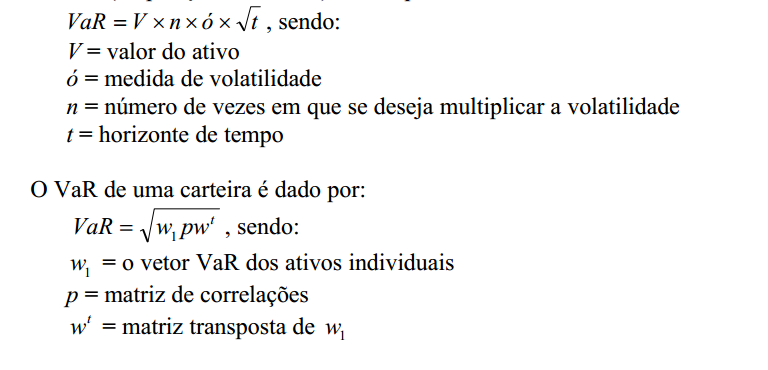

In [1]:
from IPython.display import Image

Image(filename='var11.png')

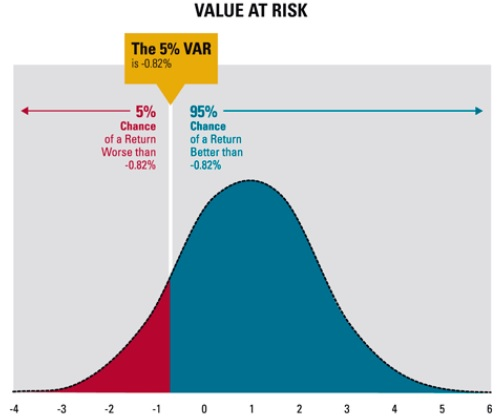

In [2]:
from IPython.display import Image

Image(filename='var12.jpg')

In [4]:
# Começando a brincadeira!
ativos = ['ITSA4.SA', 'PETR4.SA', 'ABEV3.SA', 'VALE3.SA', 'PNVL3.SA', 'MUTC34.SA', 'BBAS3.SA']

# Peso dos Ativos na Carteira:
pesos = np.array([0.15, 0.10, 0.5, 0.5, 0.20, 0.20, 0.25])

# Dates para start a avaliação:
start_date = '2020-01-01'
end_date = '2023-09-18'

In [8]:
carteira = yf.download(ativos, start=start_date, end=end_date)['Adj Close']
carteira.head()

[*********************100%%**********************]  7 of 7 completed


,ABEV3.SA,BBAS3.SA,ITSA4.SA,MUTC34.SA,PETR4.SA,PNVL3.SA,VALE3.SA
Date,,,,,,,
2020-01-02,17.020622,41.725750,10.297257,36.520596,11.732864,18.795145,38.419872
2020-01-03,16.781265,41.655952,10.146563,36.756020,11.637320,18.795145,38.137009
2020-01-06,16.861053,41.105286,10.125037,35.965782,11.774903,18.795145,37.910709
2020-01-07,16.896511,40.795059,9.988695,38.599918,11.729041,19.114246,38.186508
2020-01-08,16.816727,40.422791,9.838004,38.878147,11.656427,19.114246,38.193569


In [9]:
carteira.shape

(923, 7)

### Retornos

In [10]:
retornos = carteira.pct_change()
retornos

,ABEV3.SA,BBAS3.SA,ITSA4.SA,MUTC34.SA,PETR4.SA,PNVL3.SA,VALE3.SA
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.014063,-0.001673,-0.014634,0.006446,-0.008143,0.000000,-0.007362
2020-01-06,0.004755,-0.013219,-0.002121,-0.021500,0.011823,0.000000,-0.005934
2020-01-07,0.002103,-0.007547,-0.013466,0.073240,-0.003895,0.016978,0.007275
2020-01-08,-0.004722,-0.009125,-0.015086,0.007208,-0.006191,0.000000,0.000185
...,...,...,...,...,...,...,...
2023-09-11,0.012409,0.015866,0.024417,-0.011520,-0.000898,0.008340,0.014391
2023-09-12,-0.011536,0.005403,0.004334,0.014263,0.004795,0.017370,-0.000739
2023-09-13,-0.005106,-0.000846,0.000000,-0.007889,-0.014912,0.042276,-0.003845


In [11]:
retorno_carteira = (retornos * pesos).sum(axis=1)
retorno_carteira

Date
2020-01-02    0.000000
2020-01-03   -0.009840
2020-01-06   -0.011538
2020-01-07    0.033883
2020-01-08   -0.006752
                ...   
2023-09-11    0.014983
2023-09-12    0.012357
2023-09-13   -0.000283
2023-09-14    0.022227
2023-09-15   -0.021433
Length: 923, dtype: float64

In [13]:
retorno_portifolio = pd.DataFrame()
retorno_portifolio['Retornos'] = retorno_carteira
retorno_portifolio

,Retornos
Date,
2020-01-02,0.000000
2020-01-03,-0.009840
2020-01-06,-0.011538
2020-01-07,0.033883
2020-01-08,-0.006752
...,...
2023-09-11,0.014983
2023-09-12,0.012357
2023-09-13,-0.000283


### Plot

In [14]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=retorno_portifolio['Retornos'], nbinsx=80))
fig.update_layout(title_text = 'Distribuição dos Retornos da Carteira', template='simple_white')
fig.show()

### Value at  Risk Histórico

In [15]:
# Existem 5 % de chace das perdas diárias excederem o valor de 4,17%
var_95 = np.percentile(retorno_portifolio, 5)
var_95

-0.04170499256571997

In [16]:
var_98 = np.percentile(retorno_portifolio, 2)
var_98
# Existe 2 % de chance das minhas perdas diárias excedem os 5,55%

-0.05550097728412323

In [17]:
var_99 = np.percentile(retorno_portifolio, 1)
var_99
# Existe 1 % de chance das minhas perdas diárias excedem os 7,38%

-0.07386953720864281

In [18]:
var_40 = np.percentile(retorno_portifolio, 60)
var_40
# Existe 60 % de chance das meus ganhos diárias excedem os 0,70%

0.0070581731152804285